## Loading Libraries

In [ ]:
!pip install face-recognition
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import face_recognition

In [ ]:
base_image_path = '/content/drive/MyDrive/Face_Recognition/'

## Locating faces from an image

In [ ]:
image = face_recognition.load_image_file(base_image_path + "test.jpg")
face_locations = face_recognition.face_locations(image, model="cnn")

In [ ]:
print("I found {} face(s) in this photograph.".format(len(face_locations)))

I found 2 face(s) in this photograph.


## Storing faces into drive

In [ ]:
import os
import shutil
all_files = os.listdir(base_image_path)

if 'unknown_faces' not in all_files:
  os.mkdir(base_image_path + 'unknown_faces')
else:
  shutil.rmtree(base_image_path + 'unknown_faces')
  os.mkdir(base_image_path + 'unknown_faces')

A face is located at pixel location Top: 89, Left: 51, Bottom: 157, Right: 119


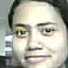

A face is located at pixel location Top: 42, Left: 152, Bottom: 124, Right: 234


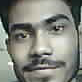

In [ ]:
from PIL import Image
count = 1
for face_location in face_locations:
    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    # saving the image
    pil_image.save(f"{base_image_path}unknown_faces/image{count}.jpg")
    count += 1
    # showing the image
    pil_image.show()

## Predicting whether the faces are present or not

In [ ]:
all_known_faces = os.listdir(base_image_path + 'known_faces')
all_unknown_faces = os.listdir(base_image_path + 'unknown_faces')

In [ ]:
all_known_faces

['alexa.jpg', 'alex.jpg', 'debmalya.jpg', 'arshia.jpg', 'angshuman.jpg']

In [ ]:
all_unknown_faces

['image1.jpg', 'image2.jpg']

In [ ]:
name_present_or_absent = dict()
for knwon_face in all_known_faces:
  knwon_name = knwon_face.split('.')[0]
  name_present_or_absent[knwon_name] = 'absent'

In [ ]:
name_present_or_absent

{'alexa': 'absent',
 'alex': 'absent',
 'debmalya': 'absent',
 'arshia': 'absent',
 'angshuman': 'absent'}

In [ ]:
for curr_known_face in all_known_faces:
  picture_of_me = face_recognition.load_image_file(base_image_path + 'known_faces/' + curr_known_face)
  my_face_encoding = face_recognition.face_encodings(picture_of_me)[0]
  for curr_unknown_face in all_unknown_faces:
    unknown_picture = face_recognition.load_image_file(base_image_path + 'unknown_faces/' + curr_unknown_face)
    unknown_face_encoding = face_recognition.face_encodings(unknown_picture)
    if(unknown_face_encoding==[]): break
    else:
      unknown_face_encoding = unknown_face_encoding[0]
      results = face_recognition.compare_faces([my_face_encoding], unknown_face_encoding)
      if results[0] == True:
          print("It's a match")
          name = curr_known_face.split('.')[0]
          name_present_or_absent[name] = 'present'
          break

It's a match
It's a match


In [ ]:
name_present_or_absent

{'alexa': 'absent',
 'alex': 'absent',
 'debmalya': 'present',
 'arshia': 'present',
 'angshuman': 'absent'}

## Storing the attendance

In [ ]:
import os
all_files = os.listdir(base_image_path)

if 'attendance.xlsx' not in all_files:
  f = open(base_image_path + 'attendance.xlsx', "x")
  f.close()
else:
  f = open(base_image_path + 'attendance.xlsx', "w")
  f.close()

In [ ]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook(base_image_path + 'attendance.xlsx')
worksheet = workbook.add_worksheet()

col=0
worksheet.write(0, col, 'Student Name')
worksheet.write(0, col + 1, 'Present/Absent')
row=1
for key in name_present_or_absent.keys():
  worksheet.write(row, col, key)
  worksheet.write(row, col + 1, name_present_or_absent[key])
  row += 1
workbook.close()

## Deleting the Group Image

In [ ]:
os.remove(base_image_path + "test.jpg")

## Front-end

[Click Here](https://facerecognition.surdebmalya11.repl.co/)